In [1]:
import geopandas as gpd

In [3]:
fields = gpd.read_file("data/brpgewaspercelen_definitief_2020_small.gpkg")
fields

,category,gewas,gewascode,jaar,status,geometry
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((117626.809 505287.535, 117622.93 505..."
1,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((117744.449 504313.788, 117746.064 50..."
2,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((117784.216 503525.695, 117789.021 50..."
3,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((117903.681 504159.929, 117908.257 50..."
4,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((118150.139 505369.637, 118168.01 505..."
...,...,...,...,...,...,...
22026,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((139366.829 479190.018, 139391.354 47..."
22027,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((138750.889 478528.117, 138722.478 47..."
22028,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((139214.523 479446.287, 139104.402 47..."
22029,Bouwland,"Maïs, snij-",259,2020,Definitief,"POLYGON ((140196.363 479281.898, 140195.206 47..."


In [4]:
xmin, xmax = (110_000, 140_000)
ymin, ymax = (470_000, 510_000)
bbox = (xmin, ymin, xmax, ymax)

In [5]:
fields = gpd.read_file("data/brpgewaspercelen_definitief_2020_small.gpkg", bbox=bbox)
fields

,category,gewas,gewascode,jaar,status,geometry
0,Bouwland,"Gerst, zomer-",236,2020,Definitief,"POLYGON ((112701.927 469461.513, 112742.745 46..."
1,Bouwland,"Maïs, snij-",259,2020,Definitief,"POLYGON ((112894.273 469539.714, 112899.962 46..."
2,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((112714.585 469792.879, 112746.317 46..."
3,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((112477.552 469951.205, 112496.172 46..."
4,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((112384.744 469953.238, 112405.63 469..."
...,...,...,...,...,...,...
22026,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((133371.14 492631.152, 133379.924 492..."
22027,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((133422.246 492887.057, 133426.347 49..."
22028,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133554.659 492738.186, 133587.6 4927..."
22029,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((133434.981 492748.79, 133481.442 492..."


<Axes: >

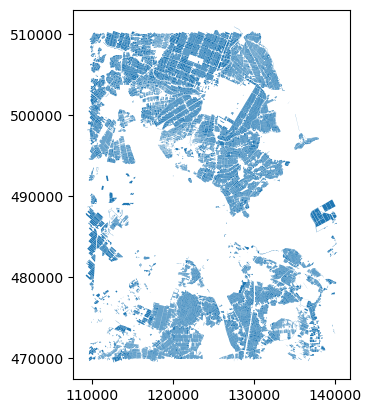

In [6]:
fields.plot()

In [7]:
xmin, xmax = (120_000, 135_000)
ymin, ymax = (485_000, 500_000)

fields_cx = fields.cx[xmin:xmax, ymin:ymax]

In [8]:
fields_cx.to_file("fields_cropped.shp")

In [9]:
fields = gpd.read_file("fields_cropped.shp")
wells = gpd.read_file("data/brogmwvolledigeset.zip")

/opt/anaconda3/envs/geospatial/lib/python3.10/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'brogmwvolledigeset.zip': 'gmw_monitoring_well' (default), 'grondwatermonitoringput', 'gmw_monitoring_tube', 'gmw_geo_ohm_cable', 'gmw_electrode', 'gmw_event', 'gmw_event_tube_data', 'gmw_event_electrode_data', 'monitoringbuis', 'geo_ohmkabel', 'elektrode', 'gebeurtenis', 'gebeurtenis_buisdata', 'gebeurtenis_elektrodedata'. Specify layer parameter to avoid this warning.
  result = read_func(


<Axes: >

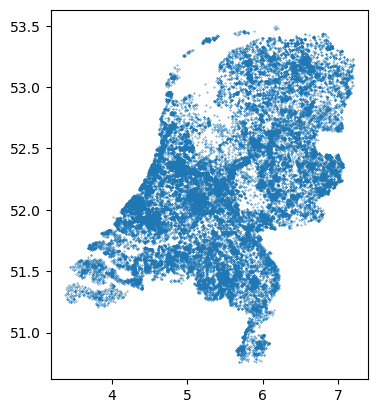

In [10]:
wells.plot(markersize=0.1)

In [16]:
wells = wells.to_crs(fields.crs)

In [15]:
fields.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [17]:
wells_clip = wells.clip(fields)
wells_clip

,bro_id,delivery_accountable_party,quality_regime,with_prehistory,delivery_context,construction_standard,initial_function,removed,number_of_monitoring_tubes,groundlevel_stable,...,corrected,latest_correction_time,under_review,under_review_time,deregistered,deregistration_time,reregistered,reregistration_time,coordinate_transformation,geometry
37326,GMW000000046390,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,nee,2.0,ja,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008,POINT (125500.001 494650.001)
39471,GMW000000045048,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,nee,1.0,nee,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008MV0,POINT (127050.001 496040.001)
38348,GMW000000045718,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,ja,1.0,nee,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008,POINT (127050.001 496040.001)
19445,GMW000000024992,50200097,IMBRO/A,ja,archiefoverdracht,onbekend,stand,nee,1.0,ja,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008,POINT (121980.001 500180.001)
40150,GMW000000043753,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,ja,1.0,nee,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008,POINT (130840 491095.001)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40583,GMW000000043416,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,nee,1.0,nee,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008MV0,POINT (133160.001 497960)
39248,GMW000000044430,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,ja,1.0,nee,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008,POINT (133160.001 497960)
38779,GMW000000045404,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,nee,1.0,ja,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008MV0,POINT (133220.001 497974.999)
40422,GMW000000044026,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,ja,1.0,ja,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008,POINT (133220.001 497974.999)


<Axes: >

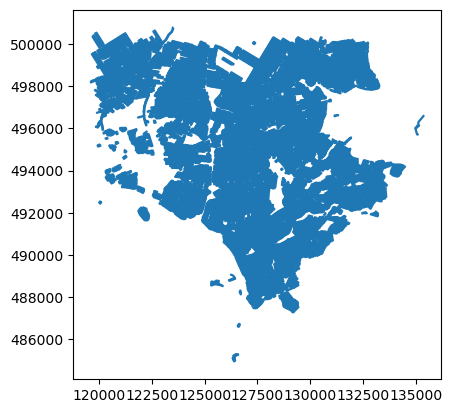

In [13]:
buffer = fields.buffer(50)
fields_buffer = fields.copy()
fields_buffer['geometry'] = buffer
fields_buffer.plot()

In [14]:
fields_buffer_dissolve = fields_buffer.dissolve()
fields_buffer_dissolve

,geometry,category,gewas,gewascode,jaar,status
0,"MULTIPOLYGON (((120135.73 492480.424, 120133.8...",Grasland,"Grasland, blijvend",265,2020,Definitief


<Axes: >

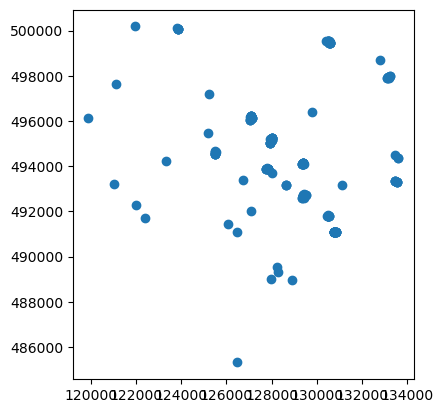

In [18]:
wells_clip_buffer = wells.clip(fields_buffer_dissolve)
wells_clip_buffer.plot()

In [19]:
fields = gpd.read_file("fields_cropped.shp")
wells = gpd.read_file("data/brogmwvolledigeset.zip")

/opt/anaconda3/envs/geospatial/lib/python3.10/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'brogmwvolledigeset.zip': 'gmw_monitoring_well' (default), 'grondwatermonitoringput', 'gmw_monitoring_tube', 'gmw_geo_ohm_cable', 'gmw_electrode', 'gmw_event', 'gmw_event_tube_data', 'gmw_event_electrode_data', 'monitoringbuis', 'geo_ohmkabel', 'elektrode', 'gebeurtenis', 'gebeurtenis_buisdata', 'gebeurtenis_elektrodedata'. Specify layer parameter to avoid this warning.
  result = read_func(


In [21]:
xmin, ymin, xmax, ymax = fields.total_bounds
wells = wells.to_crs(28992)
wells_cx = wells.cx[xmin-500:xmax+500, ymin-500:ymax+500]

In [22]:
wells_cx_500m_buffer = wells_cx.copy()
wells_cx_500m_buffer["geometry"] = wells_cx.buffer(500)

<Axes: >

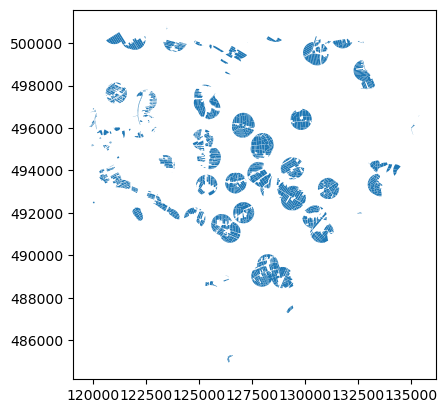

In [23]:
fields_clip_buffer = fields.clip(wells_cx_500m_buffer)
fields_clip_buffer.plot()

In [24]:
fields_wells_buffer = fields.sjoin(wells_cx_500m_buffer)
print(fields_clip_buffer.shape)

(1721, 6)


<Axes: >

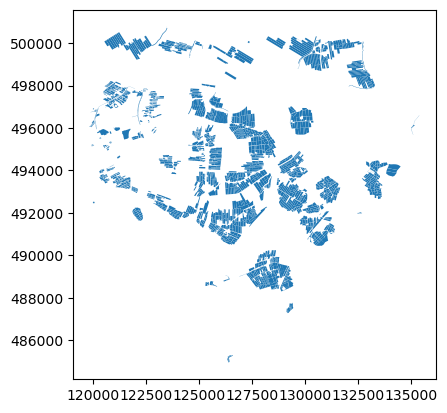

In [25]:
idx = fields_wells_buffer.index.unique()
fields_in_buffer = fields.iloc[idx]

fields_in_buffer.plot()